In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest  
from sklearn.linear_model import LinearRegression
import pandas as pd
import time

In [6]:
df = pd.read_csv('test.csv')
df_train = df.iloc[:100, :]
df_test = df.iloc[100:, :]
X_train = np.array(df_train[['Temp_F', 'Humidity']])
X_test = np.array(df_test[['Temp_F', 'Humidity']])
# X_train

In [7]:
reg = LinearRegression().fit(X_train[:, :1], X_train[:, 1:])
reg.predict(np.array([[62]]))

array([[63.63565726]])

/Users/feichi/annaconda/anaconda3/envs/bloomAir/lib/python3.10/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (256) is greater than the total number of samples (100). max_samples will be set to n_samples for estimation.
  warn(


[ 1  1  1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1]
4
[1 2 3 4]


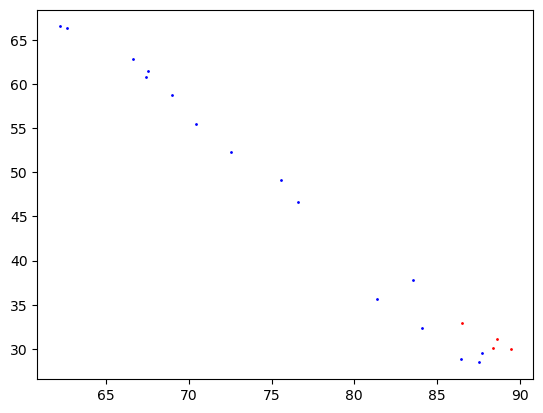

In [10]:
clf = IsolationForest(max_samples=256,random_state=100, contamination = 0.1)
clf.fit(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_test)
anomaly_data = df_test.iloc[(y_pred_test == -1), :]
alert_id = df_test.iloc[(y_pred_test == -1), :]['id']
nomal_data = df_test.iloc[(y_pred_test == 1), :]
print(len(anomaly_data))
plt.plot()
plt.scatter(anomaly_data['Temp_F'], anomaly_data['Humidity'], color = 'r', s = 1)
plt.scatter(nomal_data['Temp_F'], nomal_data['Humidity'], color = 'b', s = 1)
print(np.unique(alert_id))

In [12]:
data_list = []
lon_list = [8.545, 8.5453]
lat_list = [47.372, 47.374]
id_list = [1, 2]
id_curr = 2

for t in range(1000):
    time.sleep(1)

    if t%100 == 0:
        id_curr += 1
        lat = np.random.uniform(47.37, 47.38)
        lon = np.random.uniform(8.544, 8.556)
        id_list.append(id_curr)
        lon_list.append(lon)
        lat_list.append(lat)

    for i in range(len(id_list)):
        id = id_list[i]
        lon = lon_list[i]
        lat = lat_list[i]
        p = np.random.choice([1,0], 1, p=[0.9, 0.1])[0]
        if p == 1:
            temp = np.random.uniform(60,90)
            humidity = reg.predict(np.array([[temp]]))[0][0] + np.random.uniform(-1,1)
        if p == 0:
            temp = np.random.uniform(50, 60)
            humidity = reg.predict(np.array([[temp]]))[0][0] + np.random.uniform(-10,10)
    
        data_list.append([id, lon, lat, t, temp, humidity, 0])
        df_data = pd.DataFrame(data_list, columns = ['id', 'lon', 'lat', 't' , 'temp', 'humidity', 'c_alert'])
    
    df_data.to_csv('df_test.csv', index = 0)

/Users/feichi/annaconda/anaconda3/envs/bloomAir/lib/python3.10/site-packages/sklearn/ensemble/_iforest.py:289: UserWarning: max_samples (256) is greater than the total number of samples (100). max_samples will be set to n_samples for estimation.
  warn(


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1]
10
[2 3 4 5]


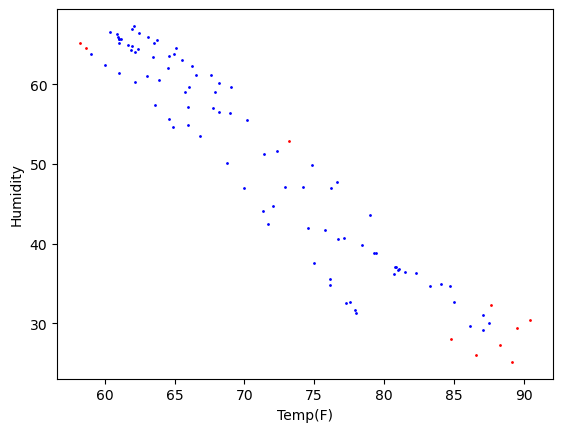

In [6]:
clf = IsolationForest(max_samples=256,random_state=100, contamination = 0.1)
clf.fit(X_train)
y_pred_test = clf.predict(X_train)
print(y_pred_test)
anomaly_data = df_train.iloc[(y_pred_test == -1), :]
alert_id = df_train.iloc[(y_pred_test == -1), :]['id']
nomal_data = df_train.iloc[(y_pred_test == 1), :]
print(len(anomaly_data))
plt.plot()
plt.scatter(anomaly_data['Temp_F'], anomaly_data['Humidity'], color = 'r', s = 1)
plt.scatter(nomal_data['Temp_F'], nomal_data['Humidity'], color = 'b', s = 1)
plt.xlabel('Temp(F)')
plt.ylabel('Humidity')
print(np.unique(alert_id))